## Project Description

Visualizations of data that spans geographic locations is much easier to convey when the user can see the data on a map. You are able to take something they already know, geography, and represent a new idea using the same construct. 

Lets focus on the topic of politics - a very geographic focused topic. The results of polling, elections, and demographics are always accompanied by a map. Why? You can visual the quantified and catigorical data _much_ easier. Here is an oversimplified math equation that conveys the idea: 
 
 `quantifiable data + catagroies + map with distinct boundries  = easy consumption of an image that is memorable`

The example demonstration below will visualize voter data for a specific geographic location. Unless you are a registered voter in the state of Arizona, these raw data will likely not resonate (unless you are a PolySci major). I will demonstrait how seemingly random infromation can be visualized in order to convey emotion from visualiztion (unless you truely hate politics and have already decided this is stupid).

## Geopandas

Geopandas is an open source python library develped for representing geospacial data. Spoiler Alert - the underlying data structure of the libray is pandas. Additionally, Geopandas utilizes another popular python librabry matplotlib. The use of these popular librabries, pandas and matplotlib, makes the Geopandas API fairly easy to consume and get familiar with. 

Just like pandas, data is contained within a dataframe and contains _series_ of infromation. The difference here is that each item in the series array is represeting a shape (coordinate on a 2D graph). Since "Geo" stands for geometry -- this explains the vectors of shapes.

A _GeoDataFrame_ has many of the same methods and attributes of a traditional pandas DataFrame. Check out the [API docs](https://geopandas.org/en/stable/docs/reference.html) and see for yourself.

Since geopandas is a library it does not utilize a backend database to store millions of coordinates for latitude and longitute. You must supply the coordinates then Geopands makes the data look good. There a multiple [source]() files that can be utilized however a shapefile `.shp` seems to be the most favorable. Lucky for us the internet exists, no Atlas needed, you can create the `.shp` file using Google Maps and some additional applications for converting format. [See GitHub Snippit](https://github.com/CenterForSpatialResearch/gis_tutorials/blob/master/19_Importing_and_Exporting_GIS_Data_from_Google_Earth_and_Google_Maps.md)


## Demonstraition

The goal of this demonstratiion is to get started using Geopandas. In order to explore this library we are going to use data from the 2018 Arizona Voter Results. The original data includes all measures on the 2018 ballot, however we will focus specifically on the U.S. Senate results for Arizona.

All elections for public office in the United States are public infromation. A simple search on Google for voter results will gaurantee results. Some sites will provide file export capabilities and for others you will have to use other Python libraries for screen scraping. I decide to first search [kaggle.com](https://www.kaggle.com/datasets/azsecretaryofstate/arizona-statewide-precinct-shapefile). Since the site is focused on data science projects I knew gathering the data would be much easier than screen scraping.

##### Files used
- AZ_Precinct_Results.csv
- z_precincts.csv
- az_vtd_2018_new_pima.shp


Lets jump in and explore!

In [1]:
import pandas as pd
import numpy as np


First we need to actually read the CSV data. There are two files `AZ_Precinct_Results.csv` and `az_precincts.csv`. The results file contains the voting results for all 2018 elections in Arizona by precinct. The other file is a lookup of all the precinct codes to the county those precincts reside.

Since we only want to take a look at U.S. Senate race data, we'll need to filter the dataframe. Also, it will be easier down the road to combine the data from the two files in order to visualize information by precinct. The precinct code `AP0002` is not very personable. Lets make the county inforamtion available.

In [101]:
votes = pd.read_csv('./assets/AZ_Precinct_Results.csv',sep=',',header=0,encoding='utf-8')
precincts = pd.read_csv('./assets/az_precincts.csv',sep=',',header=0,encoding='utf-8')

#filter dataframe to only return Senate data
votes = votes[votes['contestLongName'] == 'U.S. Senator']

#merge the two dataframes and keep all comumns from both frames
combined_data = votes.merge(precincts, on='Pctcd', how='outer')

Lets have a look at the combined dataframe

In [102]:
combined_data

,contestLongName,districtName,choiceName,partyShortName,precinctId,precinctName,precinctVotes,choicePollingPlaceVotes,choiceEarlyVotes,choiceProvisionalVotes,choiceMaricopaVotes,Pctcd,County,DistCD,DistLD
0,U.S. Senator,Federal Statewide,"Green, Angela",GRN,6110.0,02 ALPINE 02.1-02.7,7.0,2.0,5.0,0.0,0.0,AP0002,APACHE,1.0,7.0
1,U.S. Senator,Federal Statewide,"McSally, Martha",REP,6110.0,02 ALPINE 02.1-02.7,202.0,43.0,159.0,0.0,0.0,AP0002,APACHE,1.0,7.0
2,U.S. Senator,Federal Statewide,"Sinema, Kyrsten",DEM,6110.0,02 ALPINE 02.1-02.7,81.0,11.0,70.0,0.0,0.0,AP0002,APACHE,1.0,7.0
3,U.S. Senator,Federal Statewide,"Green, Angela",GRN,6111.0,03 CANYON DE CHELLY 03.1,68.0,34.0,34.0,0.0,0.0,AP0003,APACHE,1.0,7.0
4,U.S. Senator,Federal Statewide,"McSally, Martha",REP,6111.0,03 CANYON DE CHELLY 03.1,217.0,127.0,89.0,1.0,0.0,AP0003,APACHE,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC0619,MARICOPA,7.0,27.0
4471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC0618,MARICOPA,7.0,27.0
4472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC0617,MARICOPA,7.0,27.0
4473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC0616,MARICOPA,7.0,27.0


below is code for reshaping the data to only inlude the infromation we'll be focused on - prcinctVotes, partyshortName, Pctcd (precinct id), county

In [95]:
senate_frame = combined_data[['partyShortName','precinctVotes','Pctcd']].copy()
group = senate_frame.groupby(by='Pctcd')

pivot = senate_frame.pivot(index='Pctcd', columns='partyShortName')

pivot.head()


precinctVotes                      
partyShortName           NaN     DEM   GRN     REP
Pctcd                                             
AP0002                   NaN    81.0   7.0   202.0
AP0003                   NaN  1292.0  68.0   217.0
AP0005                   NaN   601.0  39.0   112.0
AP0009                   NaN   298.0  38.0  1002.0
AP0010                   NaN   314.0  10.0    46.0

Before we get to the geographic representation, lets have a look at the Arizona Senate information on a more traditional graph. I'm going to use seaborn because I think the style is better and I can create a graph much easier than other libraries. 

Have a look at the [seaborn docs](https://seaborn.pydata.org/tutorial.html) for additional infromation about consuming this librabry.

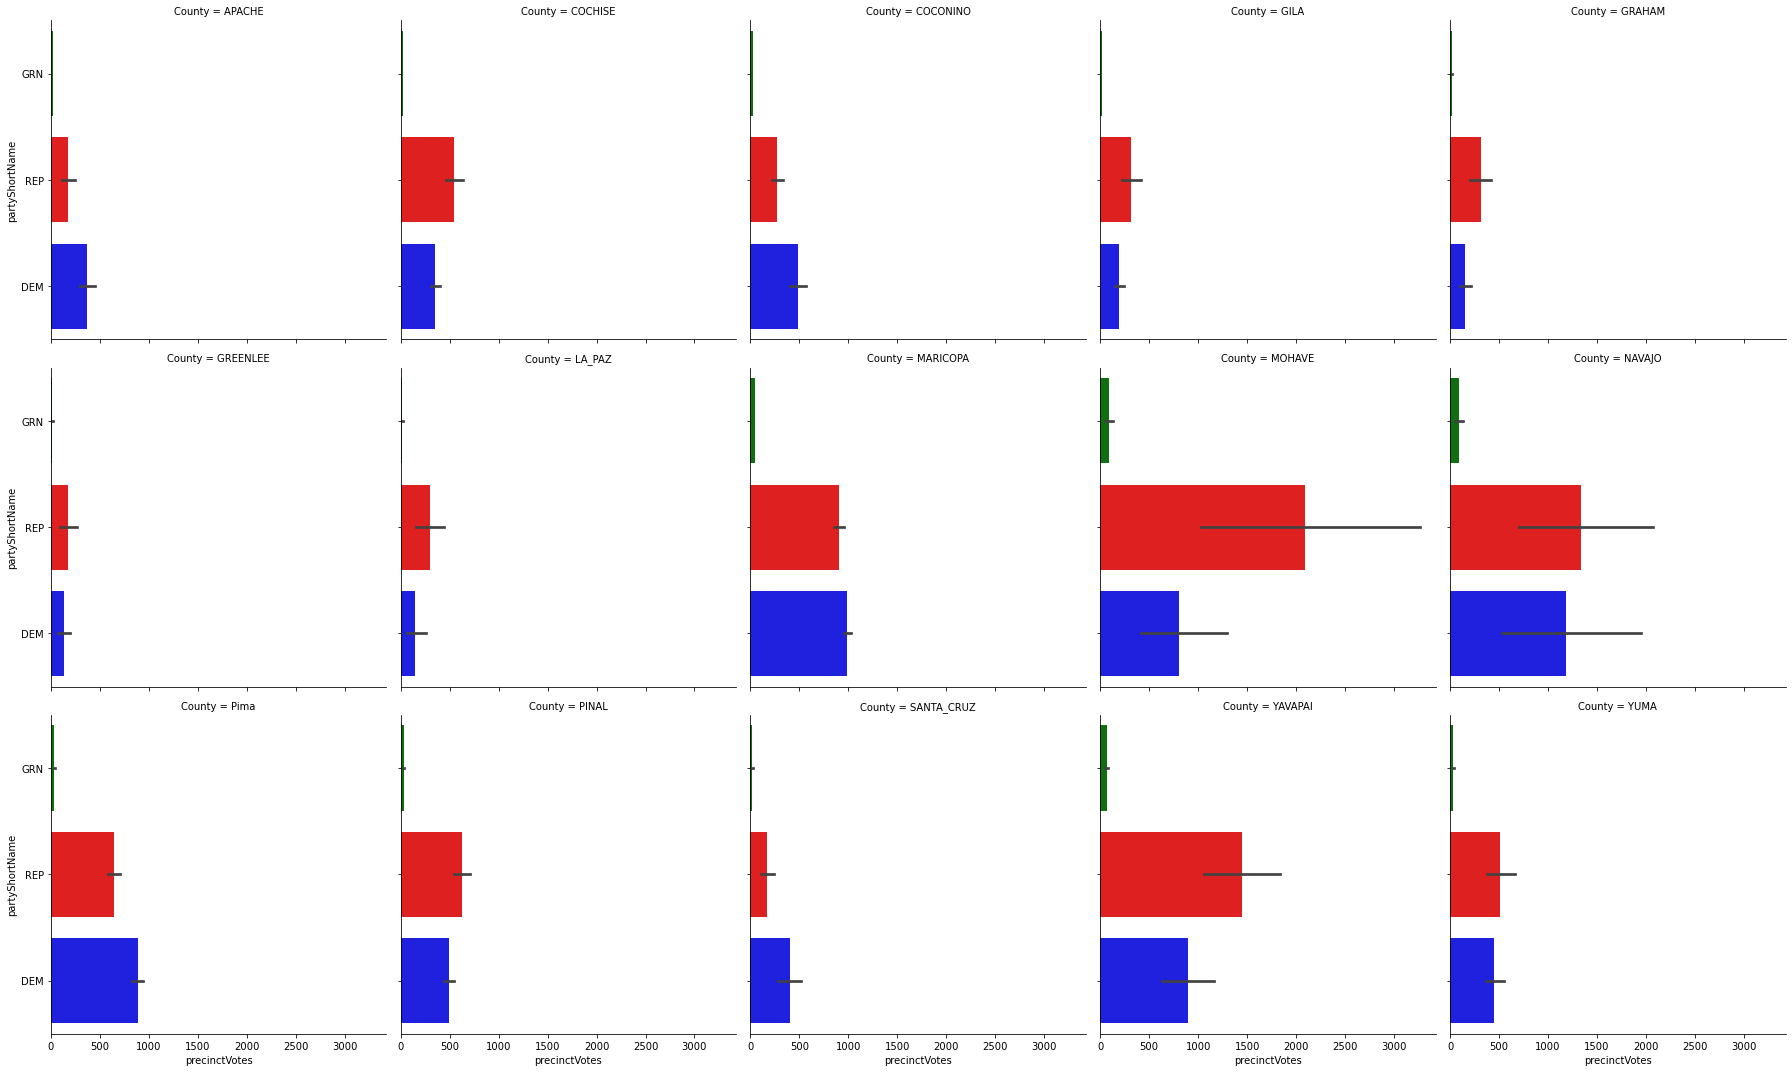

In [68]:
import seaborn as sns

sns.catplot(x="precinctVotes", col="County", y="partyShortName",kind="bar", col_wrap=5, data=combined_data,palette={'GRN': 'g', 'REP': 'r', 'DEM':'b'})

While the graph above shows the princinct votes proportion very nicely. The user has to be familiar with the geography of Arizona in order to realize the gravety of the results. Looking at the graph it appears that that Red is overwhelmingly more advantaged than green and blue. For example Mohave county shows Red with a significantly higher margin than blue. However, the population of Mohave is about 200,000. The largest county in Arizona is Maricopa with 4.5 Million. This infromation is not obvious by just looking at the results above.

Lets see this data in a map.

In order to use Geopandas you will need to do a `pip install geopandas` on the command line. Note: the libraby is not included by defult with Anaconda

you'll import the `.shp` file just like you would in pandas with `read_`

In [72]:
import geopandas as gpd

df_geo = gpd.read_file("./assets/az_precinct/az_vtd_2018_new_pima.shp") 

to view the data in the GeoDataFrame you'll just call the `head()` function

In [73]:
df_geo.head()

,pctnum,precinctna,cde_county,DIST_CON,DIST_LEG,geometry
0,AP0002,ALPINE,AP,NaN,NaN,"POLYGON ((-109.49567 33.65280, -109.49576 33.6..."
1,AP0003,CANYON DE CHELLY,AP,NaN,NaN,"POLYGON ((-109.71666 36.26151, -109.71658 36.2..."
2,AP0005,CHINLE,AP,NaN,NaN,"POLYGON ((-109.81183 36.27512, -109.80810 36.2..."
3,AP0009,CONCHO,AP,NaN,NaN,"POLYGON ((-109.53982 34.44871, -109.53928 34.4..."
4,AP0011,COTTONWOOD,AP,NaN,NaN,"POLYGON ((-109.81768 36.14760, -109.81822 36.1..."


Viewing the geographic data that has been mapped by GeoPandas is very easy. Just call `.plot()`. I've supplied a figuresize in order for scale. 

You can see from the graph below that each precinct in Arizona is visiable and outlined with a grey edge.

<AxesSubplot:>

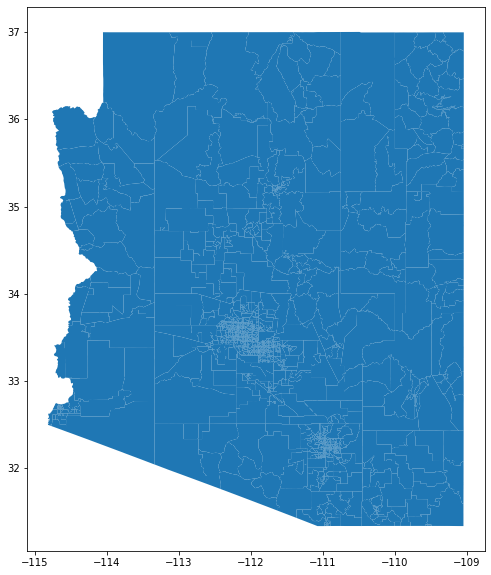

In [74]:
df_geo.plot(figsize=(15,10))

At this stage we have results data `combined_data` and a graph of the state for Arizona `df_geo`. We have to combine the two dataframes and reshape the voter results data

<!-- https://datascience.quantecon.org/applications/maps.html -->

